In [ ]:
# 配置比例
可以用plt.legend()命令来创建最简单的图例，它会自动创建一个包含每个图形元素的图例。

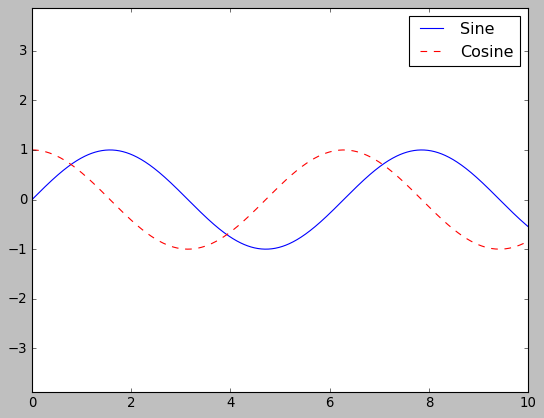

In [24]:
# 图例的默认配置
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, 
        np.sin(x), 
        '-b', 
        label = 'Sine')

ax.plot(x, 
        np.cos(x), 
        '--r', 
        label = 'Cosine')

ax.axis('equal')
leg = ax.legend()
plt.savefig(r"D:\Python-Excel\Data-analysis\数据分析实战技能\images\classic.pdf")

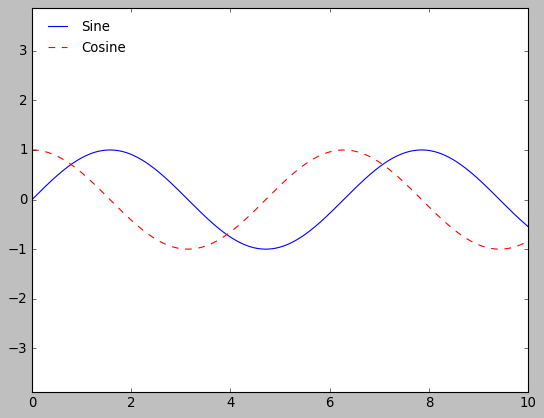

In [7]:
# 设置图例的位置，并取消外边框
ax.legend(loc = 'upper left', frameon = False)
fig
# plt.savefig(r"D:\Python-Excel\Data-analysis\数据分析实战技能\images\equal.pdf")

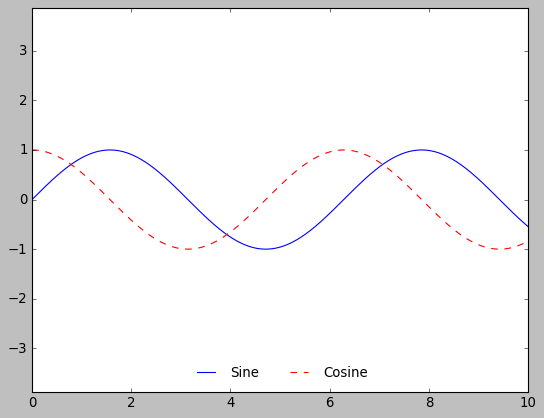

In [8]:
# 还可以用ncol参数设置图例的标签列表
ax.legend(frameon = False, loc = 'lower center', ncol = 2)
fig

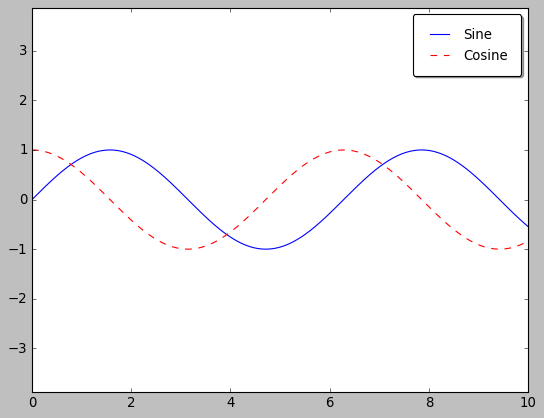

In [9]:
# 还可以为图例定义圆角边框，增加阴影、改变外边框透明度（framealpha值），或者改变文字间距
ax.legend(fancybox = True, 
          framealpha = 1, 
          shadow = True, 
          borderpad = 1)

fig

In [ ]:
### 选择图例显示的元素
- 图例会默认显示所有元素的标签。
- 如果不想显示全部，可以通过一些图形命令来指定显示图例中的哪些元素和标签。
- plt.plot()命令可以一次创建多条线，返回线条实例列表。
- 一种方法是将需要显示的线条传入plt.legend()，另一种方法是只为需要在图例中显示的线条设置标签。

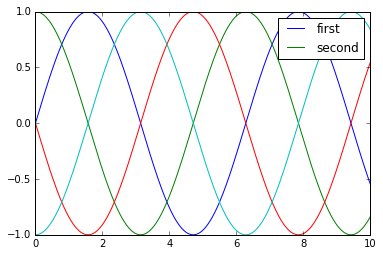

In [10]:
# 一种自定义显示哪些图例元素的方法
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines变量是一组plt.Line2D实例
plt.legend(lines[:2], ['first', 'second']);
plt.savefig(r"D:\Python-Excel\Data-analysis\数据分析实战技能\images\legend.pdf")

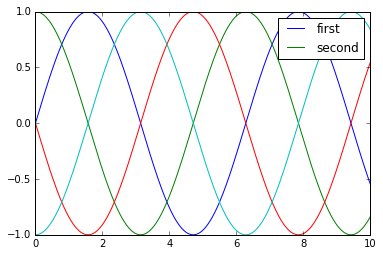

In [11]:
# 另一种自定义显示哪些图例元素的方法
plt.plot(x, y[:, 0], label = 'first')
plt.plot(x, y[:, 1], label = 'second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha = 1, frameon = True);
plt.savefig(r"D:\Python-Excel\Data-analysis\数据分析实战技能\images\frameon.pdf")

In [ ]:
### 在图例中显示不同尺寸的点

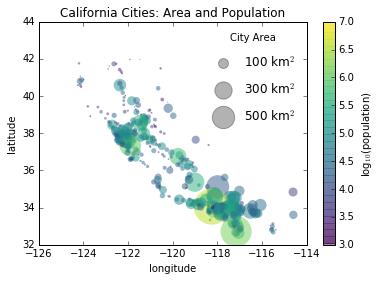

In [22]:
import pandas as pd
cities = pd.read_csv(r'D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\california_cities.csv')

# 提取感兴趣的数据
lat, lon = cities['latd'], cities['longd']
    
population, area = cities['population_total'], cities['area_total_km2']

# 用不同尺寸和颜色的散点图表示数据，但是不带标签
plt.scatter(lon, 
            lat, 
            label = None, 
            c = np.log10(population), 
            cmap = 'viridis', 
            s = area, 
            linewidth = 0, 
            alpha = 0.5)

plt.axis(aspect = 'equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label = 'log$_{10}$(population)')
plt.clim(3, 7)

# 下面创建一个图例：
# 画一些带标签和尺寸的空列表
for area in [100, 300, 500]:
    plt.scatter([], 
                [], 
                c= 'k', 
                alpha = 0.3, 
                s = area, 
                label = str(area) + ' km$^2$')
    
    plt.legend(scatterpoints = 1, 
               frameon = False, 
               labelspacing = 1, 
               title = 'City Area')
    
    plt.title('California Cities: Area and Population');
    plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\California.pdf")
    

In [ ]:
### 同时显示多个图例
- 如果你想用plt.legend()或ax.legend()方法创建第二个图例，那么第一个图例就会被覆盖。
- 我们可以通过从头开始创建一个新的图例艺术家对象（legend artist），然后用底层的（lower-level）ax.add_artist()方法在图上添加第二图例。

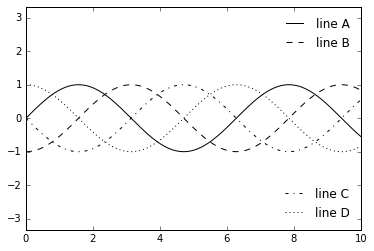

In [23]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), 
                     styles[i], 
                     color = 'black')
ax.axis('equal')
    
# 设置第一个图例要显示的线条和标签
ax.legend(lines[:2], ['line A', 'line B'], 
          loc = 'upper right', 
          frameon = False)

# 创建第二个图例，通过add_artist方法添加到图上
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'], 
             loc = 'lower right', 
             frameon = False)

ax.add_artist(leg);
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\artist.pdf")